In [1]:
# Import Modules
import random
import requests
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt

In [2]:
# Constants: API key, base URL,
api_key = "de4d4510f692c4eb92f835bfd2f77a42"
common_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Create set to get rid of repeat cities on map
cities_around_the_world = set()
city_list = []

In [3]:
# Create a list of column headers and add them to the dataframe
column_names = ["City", "Temp", "Latitude", "Longitude", "Humidity %",
                "Cloudiness %", "Wind Speed (mph)"]
dataframe = pd.DataFrame(columns=column_names)

#Variable to keep track of row index
i = 1

file_handle = open('Output.csv', 'w')

In [4]:
# Weathermap API will recognized approximately 85% of cities generated by CitiPy (500 cities doesn't produce 500 random cities) 
# Have to set length at minimum 15% bigger than the number of cities you want data for to produce 500 random cities

while len(cities_around_the_world) < 600:
    
    #Generate random latitudes and longitudes
    latitude = random.uniform(-90, 90)
    longitude = random.uniform(-180, 180)
    
    #Find the city nearest the generated lat and lon
    city = citipy.nearest_city(latitude, longitude)
    
    #Add the city to the set - set used to avoid duplicates
    cities_around_the_world.add(city.city_name)

In [5]:
# BEGINNING DATA RETRIEVAL

In [6]:
# Make an api request from weathermap API for each city in the set

for city in cities_around_the_world:
    
    # Append key and city name to url for API request
    full_url = common_url + "APPID=" + api_key + "&q=" + city
    
    
    # Make the api request from openweathermap
    data = requests.get(full_url)
    
    # Turn the generated api request into JSON format
    answer = data.json()
    
    # Returns all data about recognized cities
    if answer["cod"] != "404":
    
    # Prints the attributes desired from JSON object
        dataframe.set_value(i, "City", answer["name"])
        dataframe.set_value(i, "Temp", answer["main"]["temp"])
        dataframe.set_value(i, "Latitude", answer["coord"]["lat"])
        dataframe.set_value(i, "Longitude", answer["coord"]["lon"])
        dataframe.set_value(i, "Humidity %", answer["main"]["humidity"])
        dataframe.set_value(i, "Cloudiness %", answer["clouds"]["all"])
        dataframe.set_value(i, "Wind Speed (mph)", answer["wind"]["speed"])
        file_handle.write("Now retrieving for city #" + str(i) + "\n")
        file_handle.write(full_url + "\n")
    
    #Increase row index by 1
        i=i+1


C:\Users\jrmil\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jrmil\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jrmil\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jrmil\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jrmil\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jrmil\Anaconda3\lib\s

In [7]:
#Print the dataframe
file_handle.write(str(dataframe))
file_handle.close()

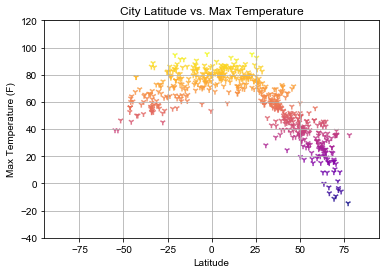

In [8]:
# Scatter Plot: Latitude v. Temp F
plt.scatter(dataframe["Latitude"], dataframe["Temp"], c=dataframe["Temp"],
            edgecolor="blue", linewidths=1, marker="1", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-95, 95])
plt.ylim([-40, 120])
plt.savefig("Latitude_Temp")

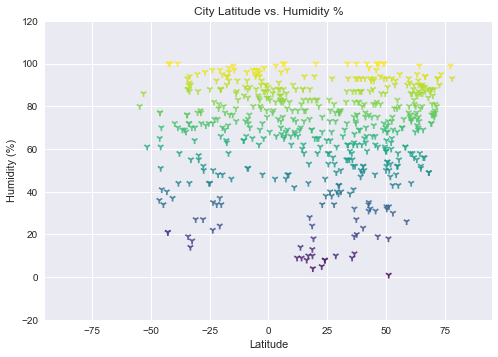

In [9]:
# Scatter Plot: Latitude v. Humidity %
plt.scatter(dataframe["Latitude"], dataframe["Humidity %"], c=dataframe["Humidity %"],
            edgecolor="black", linewidths=1, marker="1", 
            cmap='viridis', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity %")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-95, 95])
plt.ylim([-20, 120])
plt.savefig("Latitude_Humidity")

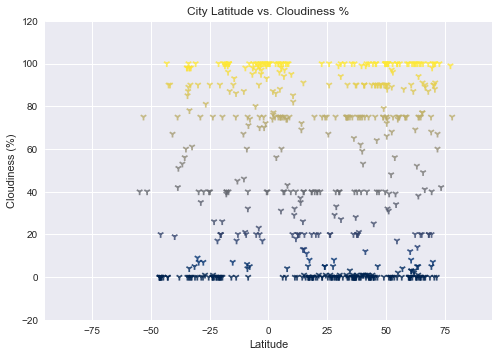

In [10]:
# Scatter Plot: Latitude v. Cloudiness %
plt.scatter(dataframe["Latitude"], dataframe["Cloudiness %"], c=dataframe["Cloudiness %"],
            edgecolor="black", linewidths=1, marker="1", 
            cmap='cividis', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness %")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-95, 95])
plt.ylim([-20, 120])
plt.savefig("Latitude_Cloudiness")

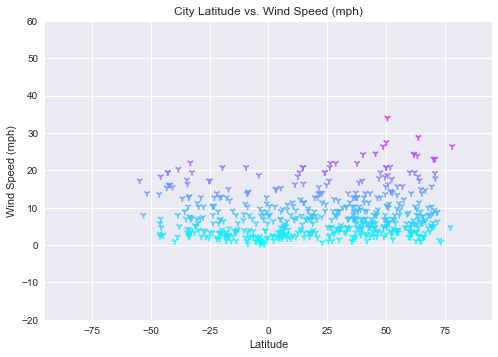

In [11]:
# Scatter Plot: Latitude v. Wind Speed
plt.scatter(dataframe["Latitude"], dataframe["Wind Speed (mph)"], c=dataframe["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="1", 
            cmap='cool', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-95, 95])
plt.ylim([-20, 60])
plt.savefig("Latitude_Wind")